## Test of the life-cycle consumption model solutions
 - this notebook undertakes various sanity checks for the source code, the SolveLifeCycleMABelief class.
- author: Tao Wang
- date: March 2022
- this is a companion notebook to the paper "Perceived income risks"

In [1]:
import numpy as np
from interpolation import interp
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
from copy import copy

In [2]:
## plot configuration 

plt.style.use('seaborn')
plt.rcParams["font.family"] = "Times New Roman" #'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'bold'

## Set the 
plt.rc('font', size=25)
# Set the axes title font size
plt.rc('axes', titlesize=20)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

## The Model Class and Solver

In [3]:
from SolveLifeCycleBelief import LifeCycle, solve_model_backward_iter,compare_2solutions

## Parameters

In [4]:
if __name__ == "__main__":

    ## parameters 
    ###################

    U = 0.2 ## transitory ue risk
    U0 = 0.0 ## transitory ue risk

    ## life cycle 

    T = 40
    L = 60
    G = np.ones(L)
    YPath = np.cumprod(G)


In [5]:
if __name__ == "__main__":

    from PrepareParameters import life_cycle_paras_y as lc_paras_Y
    ## make a copy of the imported parameters 
    lc_paras_y = copy(lc_paras_Y)
    lc_paras = lc_paras_y
    print(lc_paras)

{'ρ': 2.0, 'β': 0.98, 'P': array([[0.18, 0.82],
       [0.04, 0.96]]), 'z_val': array([0., 1.]), 'σ_ψ': 0.15, 'σ_θ': 0.15, 'U': 0.0, 'LivPrb': 0.99375, 'R': 1.01, 'W': 1.0, 'T': 40, 'L': 60, 'G': array([1.02955663, 1.02707112, 1.02472198, 1.02250445, 1.02041411,
       1.01844633, 1.01659667, 1.01486087, 1.01323462, 1.01171374,
       1.01029408, 1.00897133, 1.00774169, 1.0066011 , 1.00554514,
       1.00457048, 1.00367308, 1.00284863, 1.00209379, 1.00140452,
       1.00077689, 1.00020754, 0.99969214, 0.99922734, 0.99880946,
       0.99843448, 0.99809891, 0.99779904, 0.99753112, 0.99729151,
       0.99707657, 0.9968825 , 0.99670583, 0.99654275, 0.99638963,
       0.996243  , 0.99609894, 0.99595392, 0.99580437, 0.99564648,
       0.81734119, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

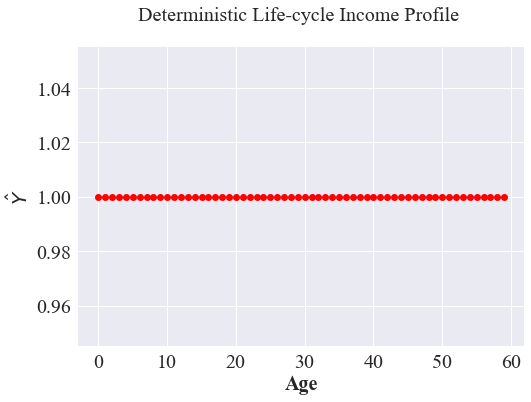

In [6]:
## a deterministic income profile 
if __name__ == "__main__":

    plt.title('Deterministic Life-cycle Income Profile \n')
    plt.plot(YPath,'ro')
    plt.xlabel('Age')
    plt.ylabel(r'$\hat Y$')

## Life-Cycle Problem 

In [9]:
if __name__ == "__main__":
    
    lc_paras_baseline = {
        ## primitives
                   'ρ':lc_paras['ρ'],     ## relative risk aversion  
                   'β': lc_paras['β'],     ## discount factor
                   'borrowing_cstr': True,
        ## prices 
                   'R':lc_paras['R'],           ## interest factor
                   'W':lc_paras['W'],           ## Wage rate
        
        ## life cycle 
        ##############################
                   'T':lc_paras['T'],   ### let the retirement age be equal to life length!!!
        ################################
                   'L':lc_paras['L'],
                   'G':lc_paras['G'],
                   'LivPrb':lc_paras['LivPrb'],       ## living probability 
        
        ## income risks 
                   'x':0.0,
                   'b_y':0.0,
                   'sigma_psi':lc_paras['σ_ψ'],
                   'sigma_eps':lc_paras['σ_θ'],
                   'P':lc_paras['P'],
                   'U':lc_paras['U'],
                   'z_val':lc_paras['z_val'], ## markov state from low to high 
        
        ## policy 
                   'unemp_insurance':lc_paras['unemp_insurance'],
                   'pension':lc_paras['pension'], ## pension
                   'λ':lc_paras['λ'],  ## tax rate
                   'λ_SS':lc_paras['λ_SS'], ## social tax rate
                   'transfer':lc_paras['transfer'],  ## transfer 
                   'bequest_ratio':lc_paras['bequest_ratio']}

In [10]:
if __name__ == "__main__":
    lc_baseline = LifeCycle(**lc_paras_baseline)

In [11]:
# Initial the end-of-period consumption policy of σ = consume all assets

if __name__ == "__main__":

    ## terminal consumption function

    m_init,σ_init = lc_baseline.terminal_solution()

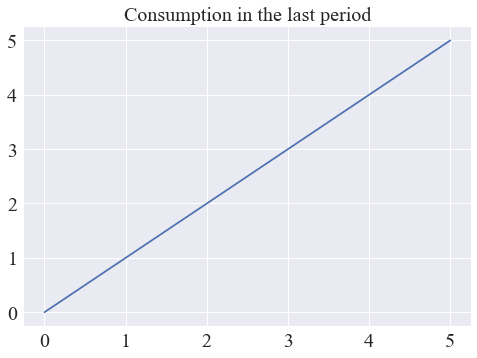

In [12]:
if __name__ == "__main__":

    plt.title('Consumption in the last period')
    plt.plot(m_init[:,0,0,0],
             σ_init[:,0,0,0])

## A special case of no retirement 

- the consumption function should be non-linear throughout life cycle because of income risks 

In [13]:
if __name__ == "__main__":
    lc_no_ret_paras = copy(lc_paras_baseline)
    lc_no_ret_paras['T']  = lc_no_ret_paras['L']  
    lc_no_ret = LifeCycle(**lc_no_ret_paras)

In [14]:
if __name__ == "__main__":
    
    t_start = time()
    
   
    ## terminal solution
    m_init,σ_init = lc_no_ret.terminal_solution()

    ## solve backward
    ms_star_no_ret, σs_star_no_ret = solve_model_backward_iter(lc_no_ret,
                                                                 m_init,
                                                                 σ_init)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 2.309985876083374


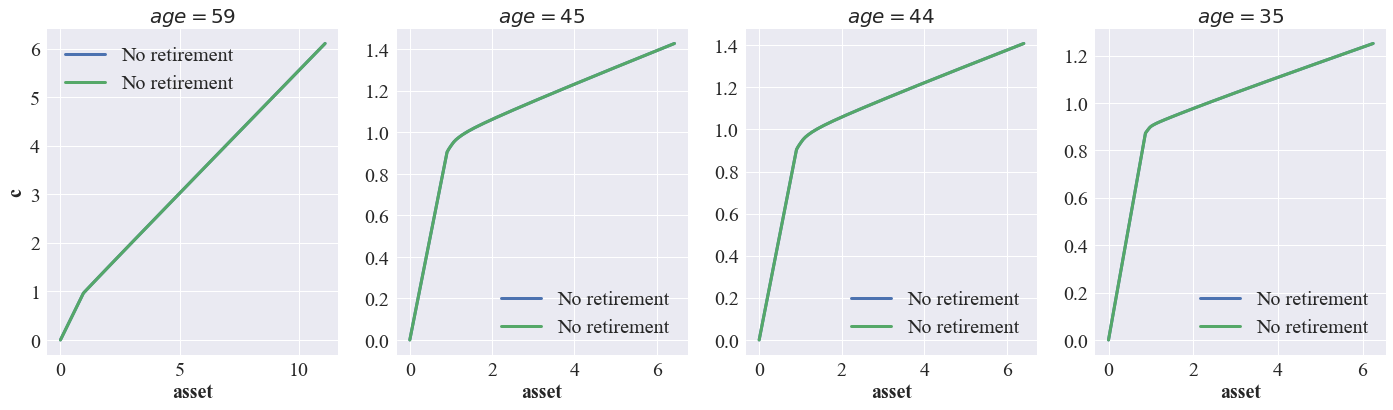

In [15]:
if __name__ == "__main__":

    ## plot c func at different age /asset grid
    years_left = [1,15,16,25]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_no_ret.L-year
        i = lc_no_ret.L-age
        m_plt,c_plt = ms_star_no_ret[i,:,0,0],σs_star_no_ret[i,:,0,0]
        axes[x].plot(m_plt,
                     c_plt,
                     label = 'No retirement',
                     lw = 3
                    )
        axes[x].legend()
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## with extremely large grid 

- the consumption function should be non-linear throughout life cycle because of income risks 

In [16]:
if __name__ == "__main__":
    lc_a_max_paras = copy(lc_paras_baseline)
    lc_a_max_paras['T'] = lc_a_max_paras['L']
    lc_a_max_paras['grid_max'] = 20
    
    
    lc_a_max = LifeCycle(**lc_a_max_paras)

In [17]:
if __name__ == "__main__":
    
    t_start = time()
    
    ## terminal solution
    m_init,σ_init = lc_a_max.terminal_solution()

    ## solve backward
    ms_star_a_max, σs_star_a_max = solve_model_backward_iter(lc_a_max,
                                                             m_init,
                                                             σ_init)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 0.7452361583709717


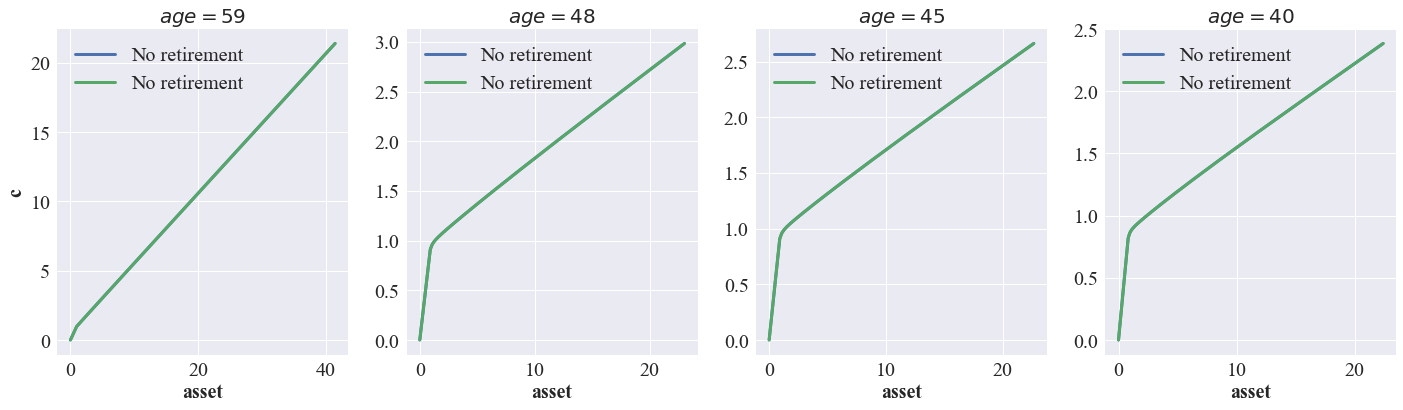

In [18]:
if __name__ == "__main__":

    ## plot c func at different age /asset grid
    years_left = [1,12,15,20]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_a_max.L-year
        i = lc_no_ret.L-age
        m_plt,c_plt = ms_star_a_max[i,:,0,0],σs_star_a_max[i,:,0,0]
        axes[x].plot(m_plt,
                     c_plt,
                     label = 'No retirement',
                     lw = 3
                    )
        axes[x].legend()
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## A special case of different periods


In [19]:
if __name__ == "__main__":
    lc_2t_paras = copy(lc_paras_baseline)
    lc_2t_paras['T'] = 25
    lc_2t_paras['L'] = 25
    
    lc_2t = LifeCycle(**lc_2t_paras)

In [20]:
if __name__ == "__main__":
    
    t_start = time()
    
   
    ## terminal solution
    m_init,σ_init = lc_2t.terminal_solution()

    ## solve backward
    ms_star_2t, σs_star_2t = solve_model_backward_iter(lc_2t,
                                                       m_init,
                                                       σ_init)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 0.3032228946685791


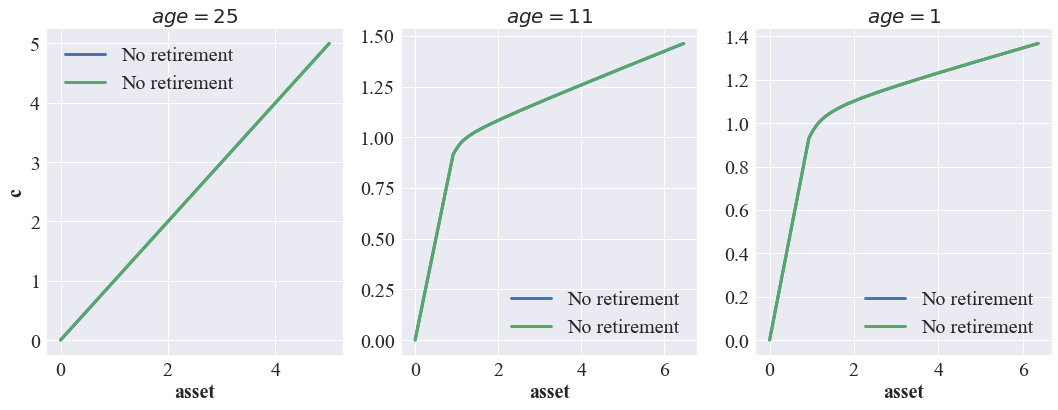

In [21]:
if __name__ == "__main__":

    ## plot c func at different age /asset grid
    years_left = [0,14,24]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_2t.L-year
        i = lc_2t.L-age
        m_plt,c_plt = ms_star_2t[i,:,0,0],σs_star_2t[i,:,0,0]
        axes[x].plot(m_plt,
                     c_plt,
                     label = 'No retirement',
                     lw = 3
                    )
        axes[x].legend()
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## No transitory risks 

In [22]:
if __name__ == "__main__":
    lc_no_triks_paras = copy(lc_paras_baseline)
    lc_no_triks_paras['sigma_eps'] = 0.0
    
    lc_no_trisk = LifeCycle(**lc_no_triks_paras)

In [23]:
if __name__ == "__main__":
    
    t_start = time()
    
   
    ## terminal solution
    m_init,σ_init = lc_no_trisk.terminal_solution()

    ## solve backward
    ms_star_no_trisk, σs_star_no_trisk = solve_model_backward_iter(lc_no_trisk,
                                                                 m_init,
                                                                 σ_init)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 0.0889890193939209


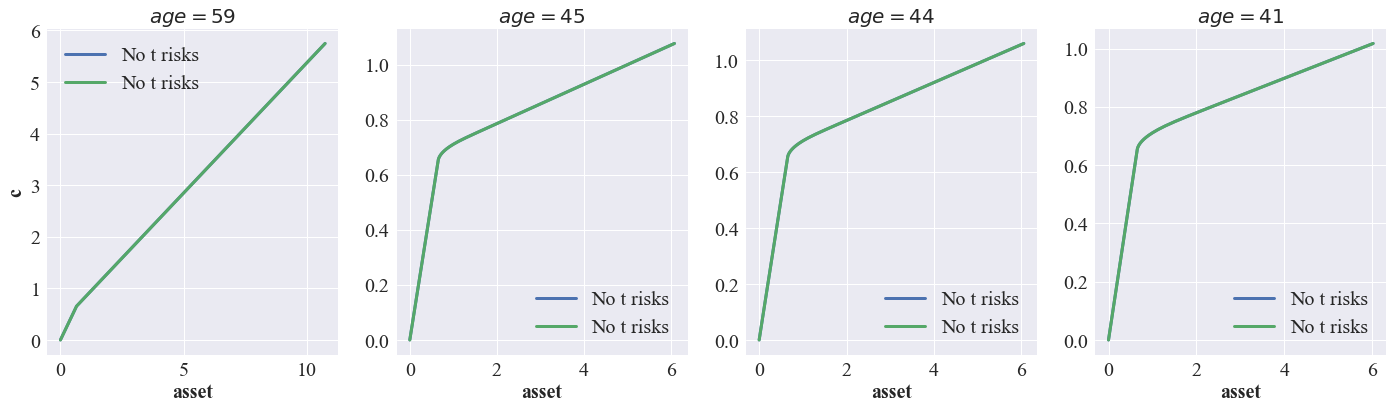

In [24]:
if __name__ == "__main__":

    ## plot c func at different age /asset grid
    years_left = [1,15,16,19]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_no_trisk.L-year
        i = lc_no_trisk.L-age
        m_plt,c_plt = ms_star_no_trisk[i,:,0,0],σs_star_no_trisk[i,:,0,0]
        axes[x].plot(m_plt,
                     c_plt,
                     label = 'No t risks',
                     lw = 3
                    )
        axes[x].legend()
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## No permanent risks 

In [25]:
if __name__ == "__main__":
    lc_no_prisk_paras = copy(lc_paras_baseline)
    lc_no_prisk_paras['sigma_psi'] = 0.001*lc_paras['σ_ψ']
    
    lc_no_prisk = LifeCycle(**lc_no_prisk_paras)

In [26]:
if __name__ == "__main__":
    
    t_start = time()
    
    ## terminal solution
    m_init,σ_init = lc_no_prisk.terminal_solution()

    ## solve backward
    ms_star_no_prisk, σs_star_no_prisk = solve_model_backward_iter(lc_no_prisk,
                                                                 m_init,
                                                                 σ_init)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 0.6177318096160889


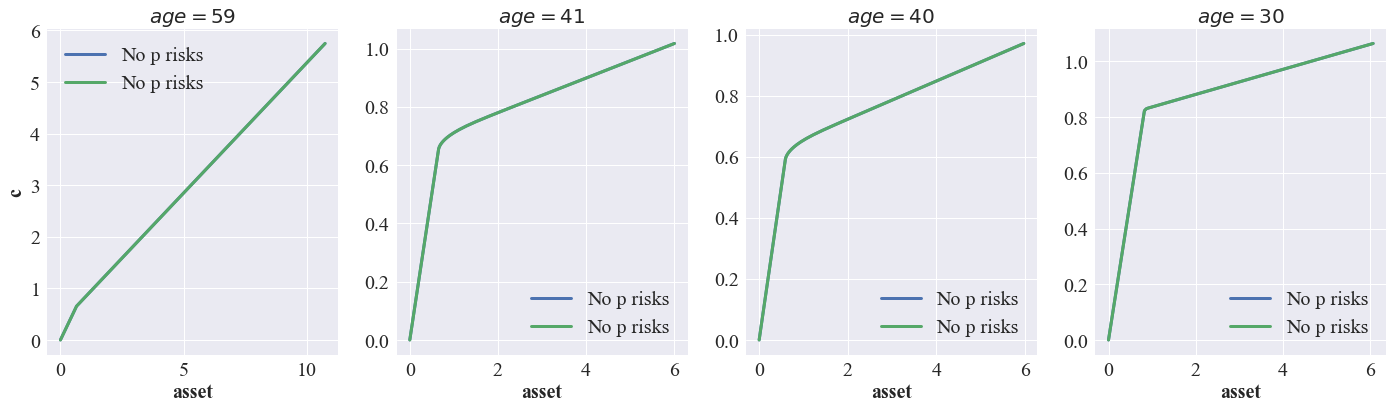

In [27]:
if __name__ == "__main__":

    ## plot c func at different age /asset grid
    years_left = [1,19,20,30]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_baseline.L-year
        i = lc_baseline.L-age
        m_plt,c_plt = ms_star_no_prisk[i,:,0,0],σs_star_no_prisk[i,:,0,0]
        axes[x].plot(m_plt,
                     c_plt,
                     label = 'No p risks',
                     lw = 3
                    )
        axes[x].legend()
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## subjective (low risk) versus objective (high risk)

In [28]:
if __name__ == "__main__":
    lc_obj_paras = copy(lc_paras_baseline)
    lc_obj_paras['grid_max'] = 10
    lc_obj = LifeCycle(**lc_obj_paras)
    
    lc_sub_paras = copy(lc_paras_baseline)
    lc_sub_paras['sigma_psi'] = lc_paras['σ_ψ_sub']
    lc_sub_paras['sigma_eps'] = lc_paras['σ_θ_sub']
    lc_sub_paras['grid_max'] = 10 
    lc_sub = LifeCycle(**lc_sub_paras)
    
 
    models = [lc_sub,lc_obj]
    model_names = ['subjective','objective']

In [29]:
if __name__ == "__main__":
    
    t_start = time()
    
    ms_stars =[]
    σs_stars = []

    for i,model in enumerate(models):
        ## terminal solution
        m_init,σ_init = model.terminal_solution()

        ## solve backward
        ms_star, σs_star = solve_model_backward_iter(model,
                                                     m_init,
                                                     σ_init)
        ms_stars.append(ms_star)
        σs_stars.append(σs_star)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 1.232314109802246


should be positive


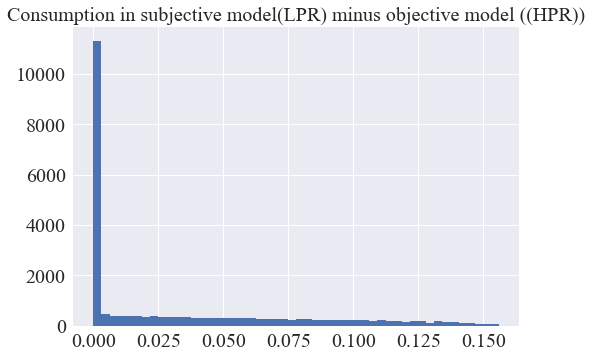

In [30]:
sub_minus_obj = compare_2solutions(ms_stars,
                                  σs_stars)

plt.hist(sub_minus_obj.flatten(),
         bins=50)
plt.title('Consumption in subjective model(LPR) minus objective model ((HPR))')
print('should be positive')

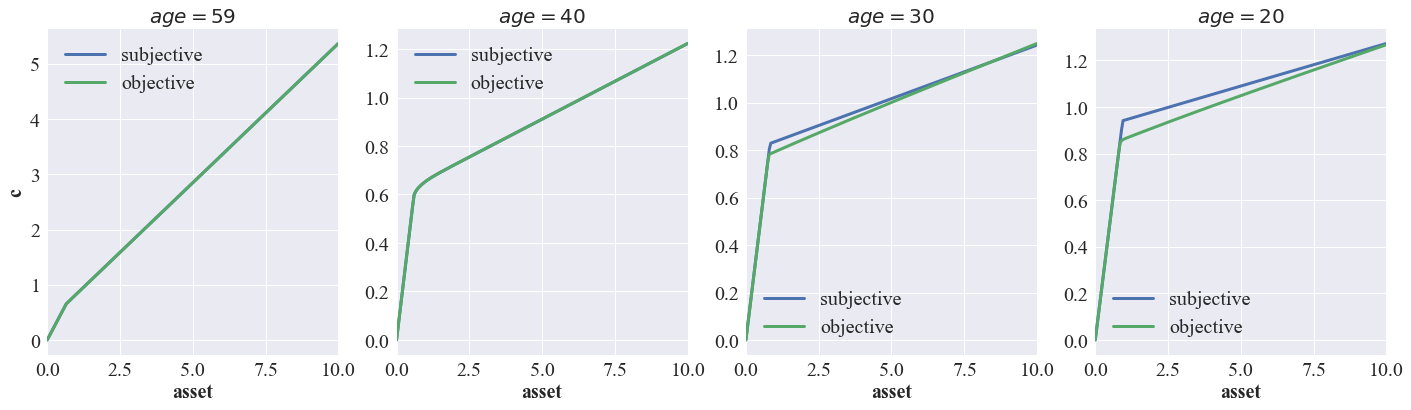

In [31]:
if __name__ == "__main__":

    m_grid = np.linspace(0.0,10.0,200)
    ## plot c func at different age /asset grid
    years_left = [1,20,30,40]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_baseline.L-year
        i = lc_baseline.L-age
        for k,model_name in enumerate(model_names):
            m_plt,c_plt = ms_stars[k][i,:,0,0,0],σs_stars[k][i,:,0,0,0]
            c_func = lambda m: interp(m_plt,c_plt,m)
            axes[x].plot(m_grid,
                         c_func(m_grid),
                         label = model_name,
                         lw = 3
                        )
        axes[x].legend()
        axes[x].set_xlim(0.0,np.max(m_grid))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## low versus high risks 

In [32]:
if __name__ == "__main__":

    t_start = time()

    sigma_psi_ls = [lc_paras['σ_ψ_sub'],lc_paras['σ_ψ']]
    sigma_eps_ls = [lc_paras['σ_θ_sub'],lc_paras['σ_θ']]
    
    ms_stars =[]
    σs_stars = []
    
    for i,sigma_psi in enumerate(sigma_psi_ls):
        lc_baseline.T = L
        lc_baseline.sigma_psi = sigma_psi
        lc_baseline.sigma_eps = sigma_eps_ls[i]
        ### this line is very important!!!!
        #### need to regenerate shock draws for new sigmas
        lc_baseline.prepare_shocks()
        
        ## terminal solution
        m_init,σ_init = lc_baseline.terminal_solution()
        
        ## solve backward
        ms_star, σs_star = solve_model_backward_iter(lc_baseline,
                                                     m_init,
                                                     σ_init)
        ms_stars.append(ms_star)
        σs_stars.append(σs_star)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 3.9152798652648926


should be positive


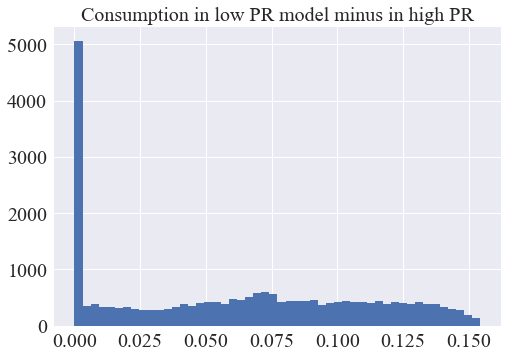

In [33]:
# compare solutions

sub_minus_obj = compare_2solutions(ms_stars,
                                  σs_stars)

plt.hist(sub_minus_obj.flatten(),
         bins=50)
plt.title('Consumption in low PR model minus in high PR')
print('should be positive')

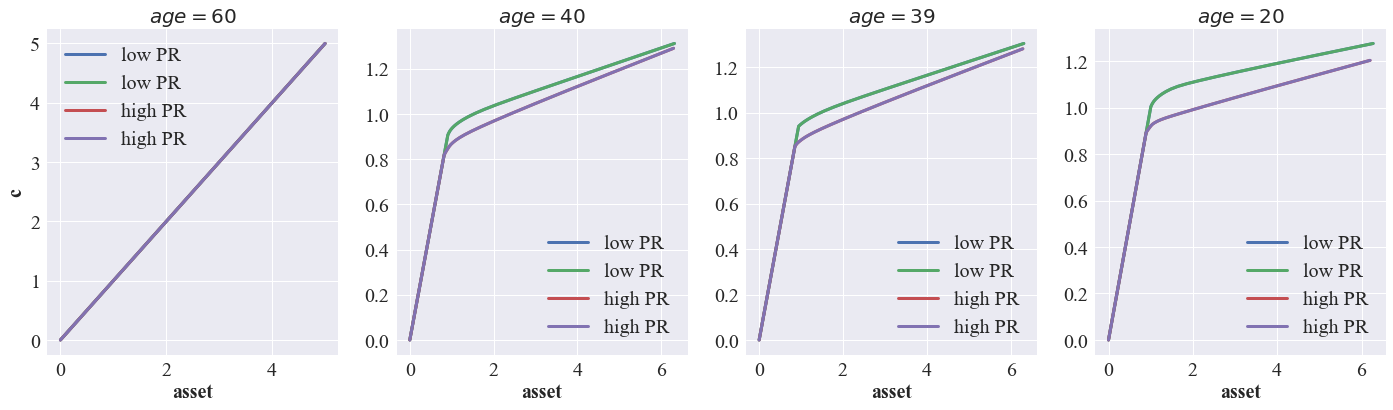

In [34]:
if __name__ == "__main__":

    m_grid = np.linspace(0.0,10.0,200)
    ## plot c func at different age /asset grid
    years_left = [0,20,21,40]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_baseline.L-year
        i = lc_baseline.L-age
        model_names = ['low PR','high PR']
        for k,model_name in enumerate(model_names):
            m_plt,c_plt = ms_stars[k][i,:,0,0],σs_stars[k][i,:,0,0]
            #c_func = lambda m: interp(m_plt,c_plt,m)
            axes[x].plot(m_plt,
                         c_plt,
                         label = model_name,
                         lw=3
                        )
        axes[x].legend()
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## transitory UE risk as a special case of persistent UE





In [37]:
if __name__ == "__main__":
    
    U_prb = 0.2

    lc_trans_ue_paras = copy(lc_paras_baseline)
    lc_trans_ue_paras['U'] = U_prb
    
    lc_trans_mkv_paras = copy(lc_paras_baseline)
    lc_trans_mkv_paras['U'] = U0
    lc_trans_mkv_paras['P'] = np.array([[U_prb,1-U_prb],
                                        [U_prb,1-U_prb]]
                                      )
    lc_trans_mkv_paras['ue_markov'] = True
    
    
    lc_trans_ue =  LifeCycle(**lc_trans_ue_paras)
    lc_trans_mkv =  LifeCycle(**lc_trans_mkv_paras)


    models = [lc_trans_ue,lc_trans_mkv] 
    model_names = ['transitory UE',
                  'markov UE:special case']

    t_start = time()

    ms_stars =[]
    σs_stars = []
    for i,model in enumerate(models):
        ## terminal solution
        m_init,σ_init = model.terminal_solution()
        #### need to regenerate shock draws for new sigmas
        ms_star, σs_star = solve_model_backward_iter(model,
                                                     m_init,
                                                     σ_init)
        ms_stars.append(ms_star)
        σs_stars.append(σs_star)


    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 1.2439818382263184


should be close to zero


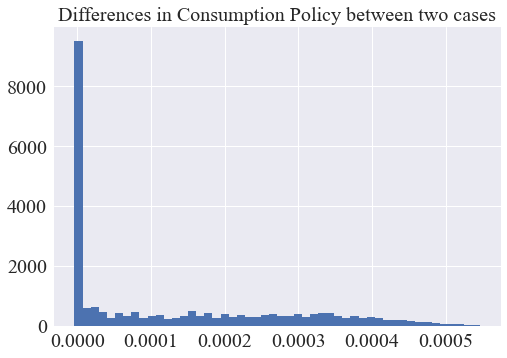

In [38]:
# compare solutions

trans_mkv_diff = compare_2solutions(ms_stars,
                                  σs_stars)

plt.hist(trans_mkv_diff.flatten(),
         bins=50)
plt.title('Differences in Consumption Policy between two cases')
print('should be close to zero')

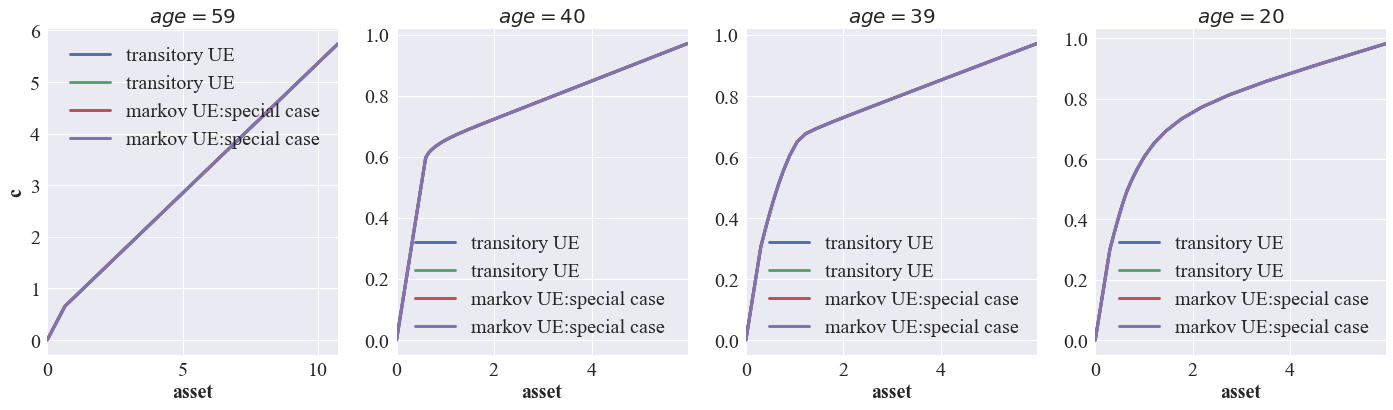

In [39]:
if __name__ == "__main__":


    ## plot c func at different age /asset grid
    years_left = [1,20,21,40]

    n_sub = len(years_left)

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_baseline.L-year
        i = lc_baseline.L-age
        for k,model_name in enumerate(model_names):
            m_plt,c_plt = ms_stars[k][i,:,0,0],σs_stars[k][i,:,0,0]
            axes[x].plot(m_plt,
                         c_plt,
                         label = model_name,
                         lw=3,
                        )
        axes[x].legend()
        axes[x].set_xlim(0.0,np.max(m_plt))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))